In [13]:
from qa_tool_v2_spark import qa
from Trax.Utils.Conf.Configuration import Config


Config.init(app_name='ttt',default_env='prod', config_file='~/theGarage/Trax/Apps/Services/KEngine/k-engine-prod.config')
qa_tool = qa('jnjuk',start_date='2018-07-01', end_date='2018-07-2' )

Log was not initialized - get_credentials: get request returned errors: [u'entry for role ilanp@traxretail.com not found'] (extra=None)
Log was not initialized - get_credentials: get request returned errors: [u'entry for role ilanp@traxretail.com not found'] (extra=None)
Log was not initialized - get_credentials: Failed to retrieve credentials from vault: exception is :Login to vault failed 1 tiems. last login resulted errors: [u'entry for role ilanp@traxretail.com not found'] (extra=None)
Log was not initialized - Traceback (most recent call last):
  File "/home/Ilan/dev/theGarage/Trax/Cloud/Services/Connector/Credentials.py", line 89, in get_credentials
    token = cls.cloud_adapter.get_vault_token(force)
  File "/home/Ilan/dev/theGarage/Trax/Cloud/Services/Connector/ConnectorAdapter.py", line 94, in get_vault_token
    self._login_vault_request()
  File "/home/Ilan/dev/theGarage/Trax/Cloud/Services/Connector/ConnectorAdapter.py", line 70, in _login_vault_request
    self._check_for_

No handlers could be found for logger "Trax"


In [14]:
 qa_tool.get_statistics()

 
                <p>
                <br>
                   +---------------------------+    <br>
                    Project Name:  jnjuk  <br>
                    Dates:  2018-07-01 - 2018-07-2  <br>    
                    Total Results: 3351   <br>    
                    Total Sessions: 25   <br>    
                    Total Kpi: 16   <br>       
                   +---------------------------+  <br>
                </p>

              


In [15]:
kpi = qa_tool.merged_kpi_results.select('client_name','result').toPandas()
static = qa_tool.static_kpi.toPandas()


In [25]:
filter = 'result is not null  and client_name = {}'.format('"promo_sub_category"')
res = qa_tool.merged_kpi_results.filter(filter).select('client_name','result').toPandas()
print not res.empty

False


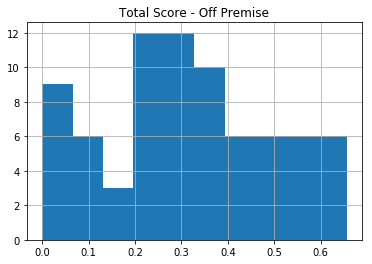

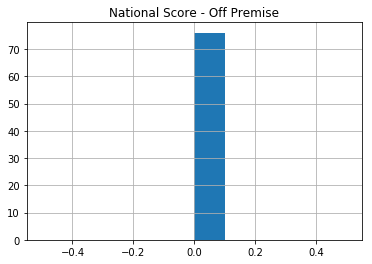

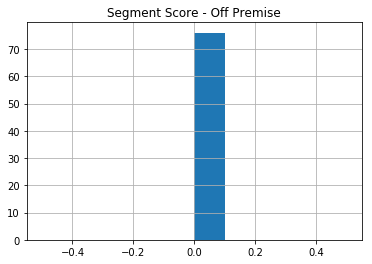

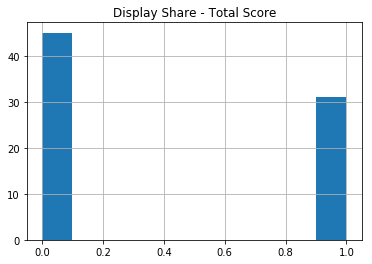

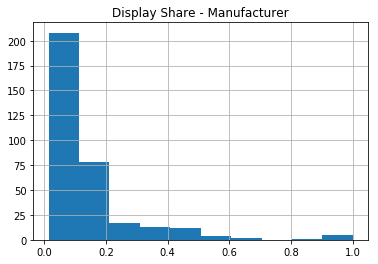

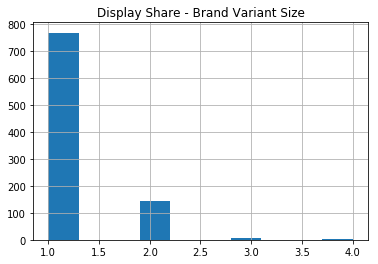

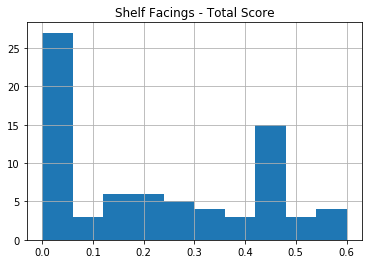

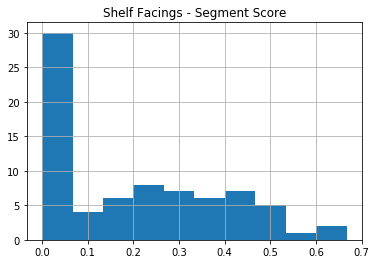

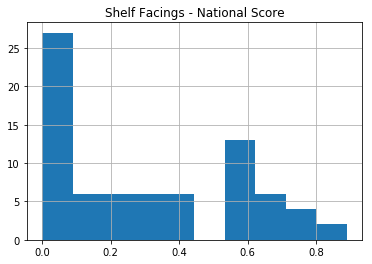

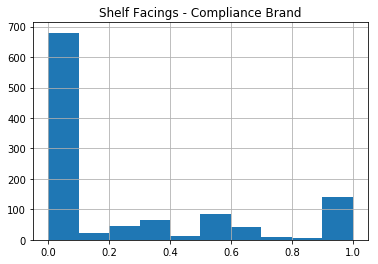

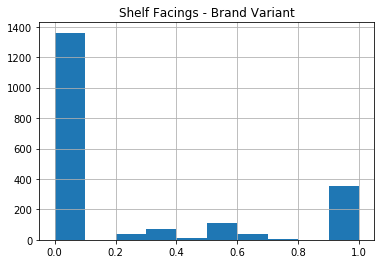

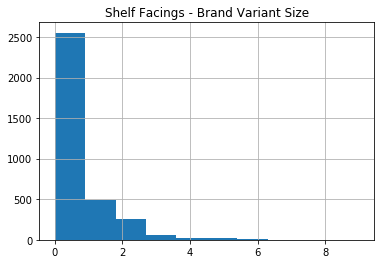

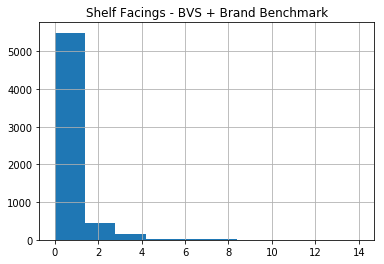

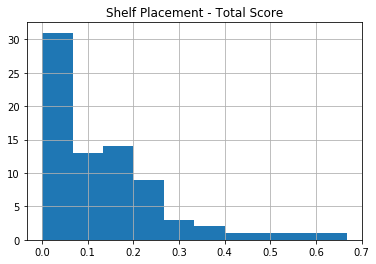

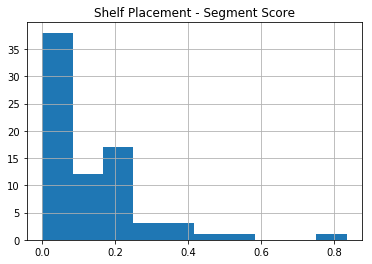

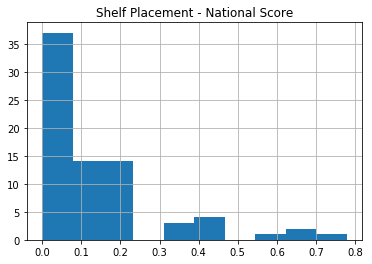

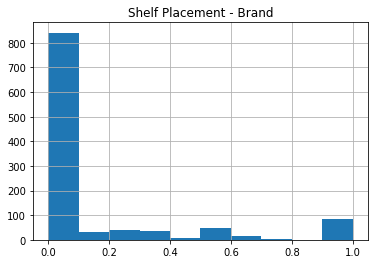

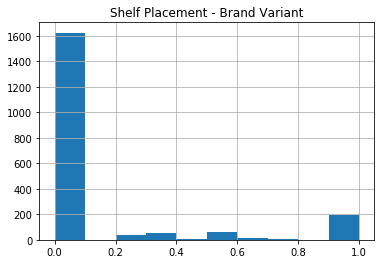

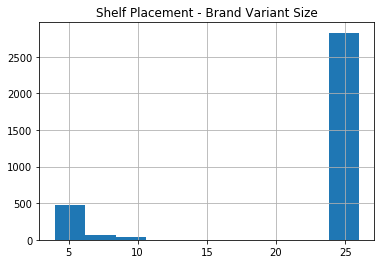

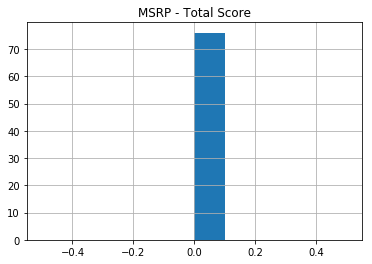

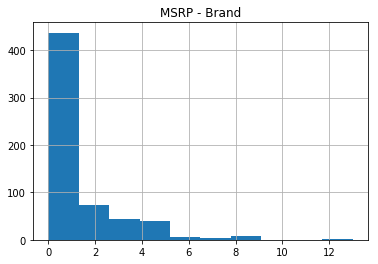

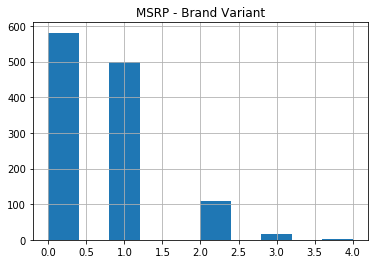

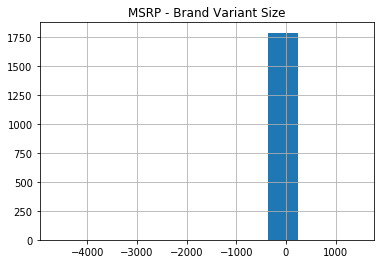

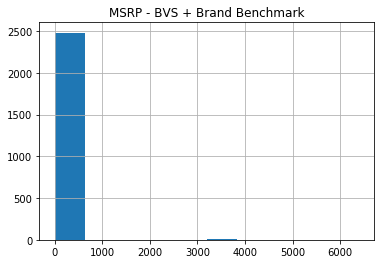

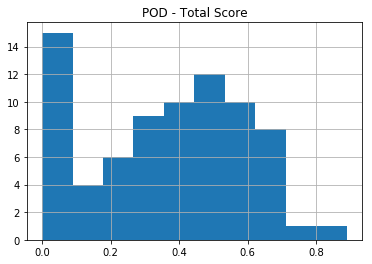

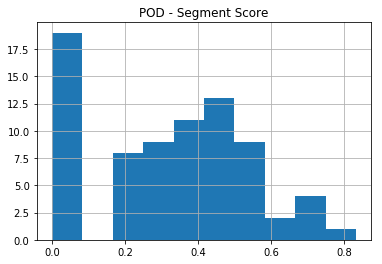

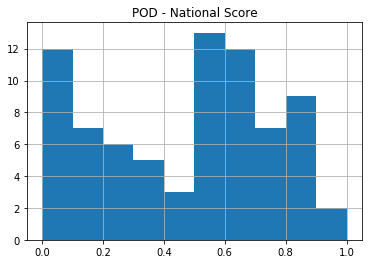

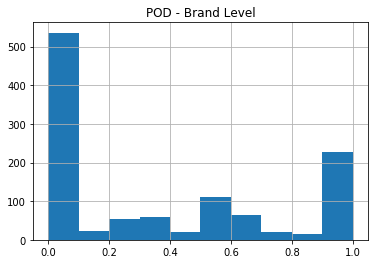

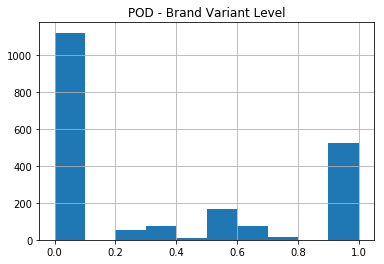

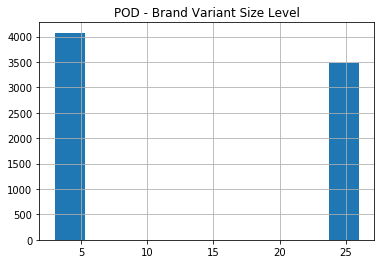

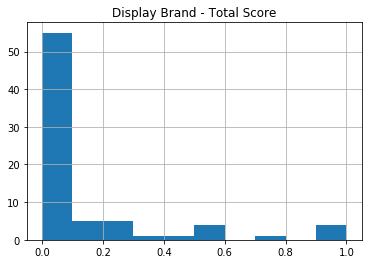

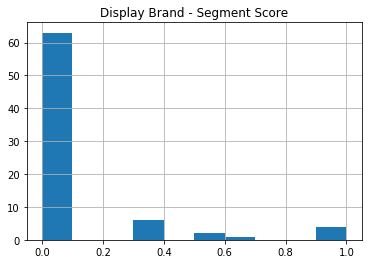

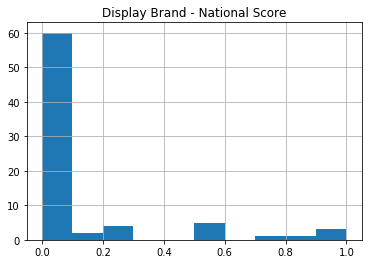

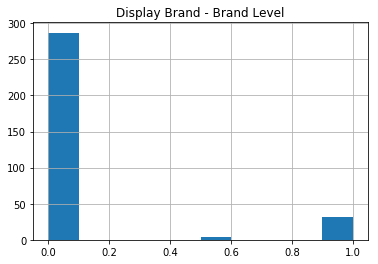

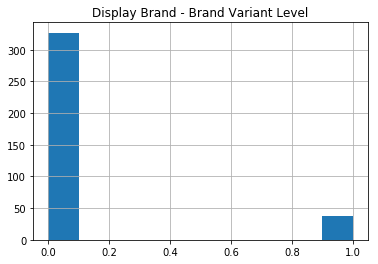

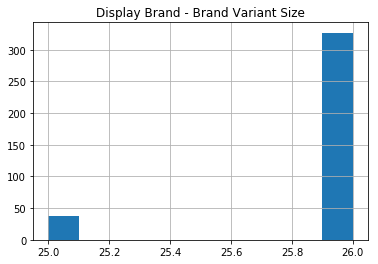

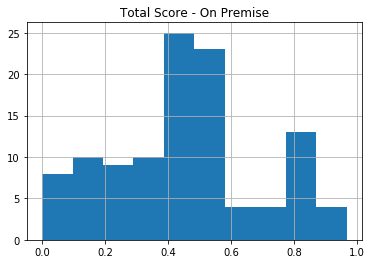

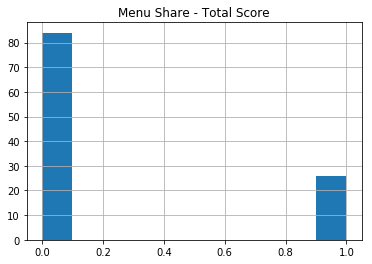

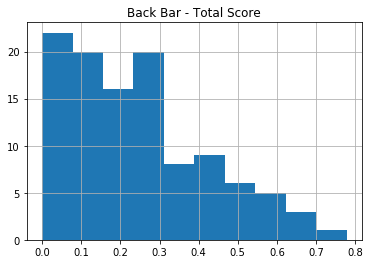

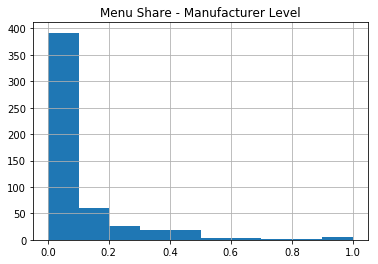

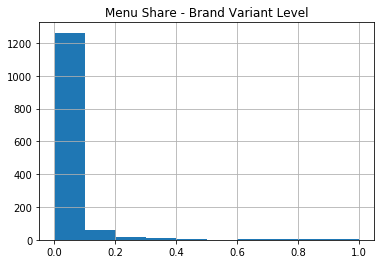

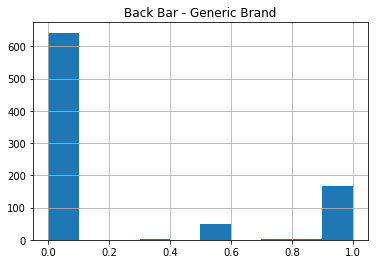

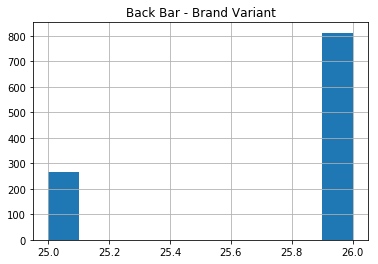

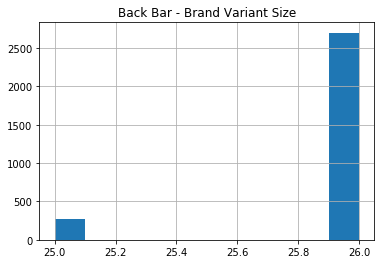

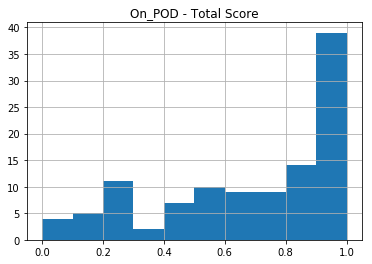

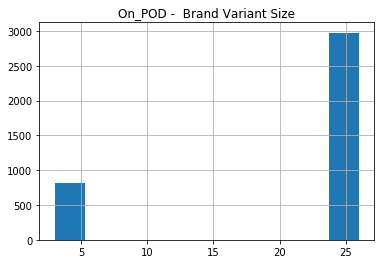

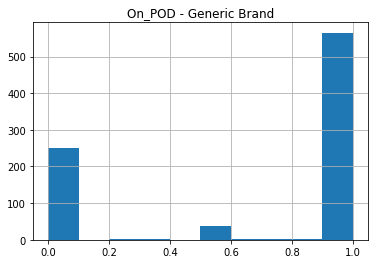

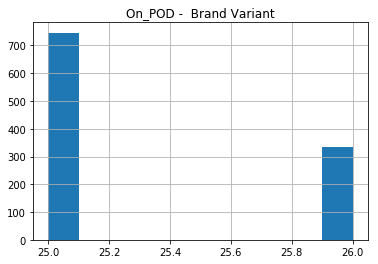

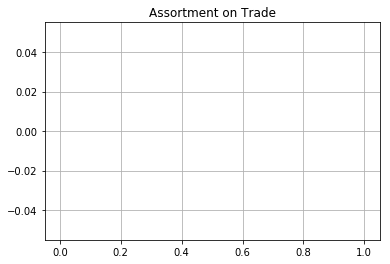

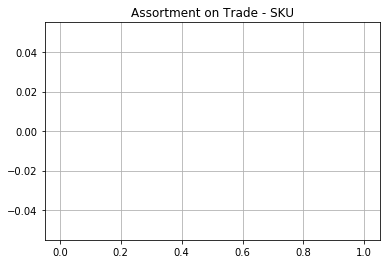

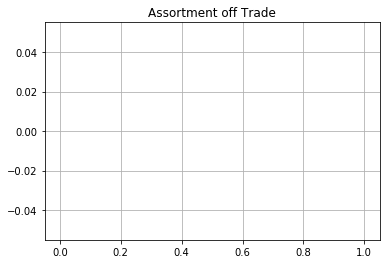

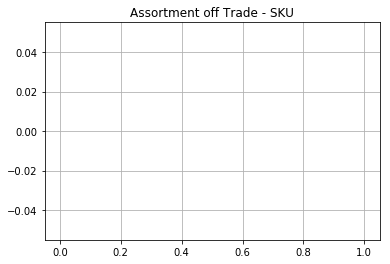

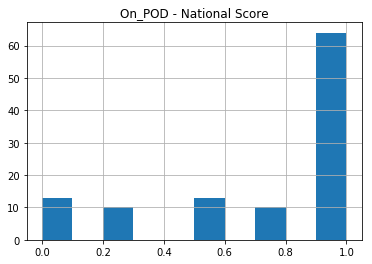

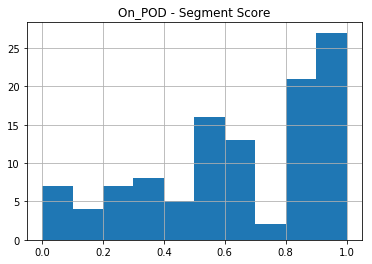

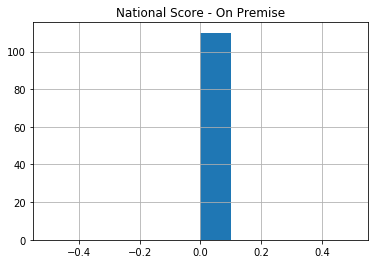

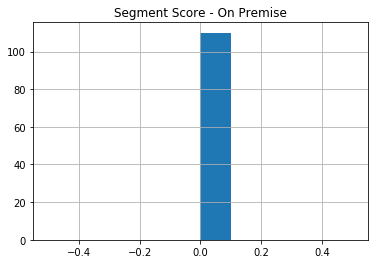

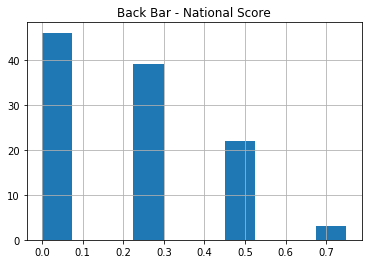

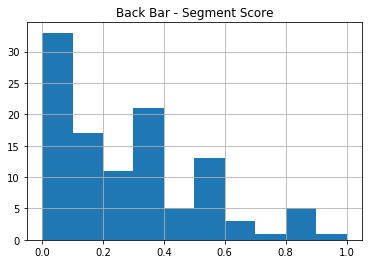

In [25]:
import matplotlib.pyplot as plt


for i,row in static.iterrows():    
    row['client_name']
    res = kpi.loc[(kpi['client_name'] == row['client_name'])]
    res[['client_name','result']].hist()
    plt.title(row['client_name'])
    plt.savefig(row['client_name'])
    
    
    
            static = self.static_kpi.toPandas()

        for i, row in static.iterrows():

            filter = 'client_name == {}'.format(row['client_name'])
            res = self.merged_kpi_results.filter(filter).select('client_name','result').toPandas()
            # res = kpi.loc[(kpi['client_name'] == row['client_name'])]
            res[['client_name', 'result']].hist()
            plt.title(row['client_name'])
            plt.savefig( + "test/" + row['client_name'])

TypeError: <matplotlib.axes._subplots.AxesSubplot object at 0x7fe7476dd4d0> is not JSON serializable

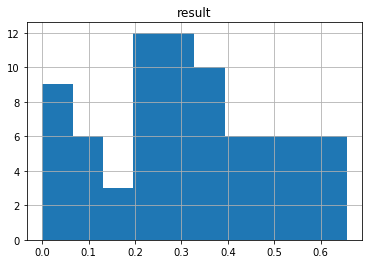

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


init_notebook_mode(connected=True)

for i,row in static.iterrows():    
    row['client_name']
    res = kpi.loc[(kpi['client_name'] == row['client_name'])]
    data = [go.Histogram(x=res[['client_name','result']].hist())]
    py.iplot(data)

